### Comments from Candidate
This is a self-contained notebook for the data science assignment, submitted as part of the interview process.

The backbone libraries I used are `pandas`, `sklearn`, and `matplotlib`. I have also used `treeinterpreter`, which may needs to be installed with a magic command: `%pip install treeinterpreter`.

To save some time, I commented out a few resource intensive grid searches, and wrote down the results I obtained. In case you would like to run them, they should take less than 30 minutes on a modern machine as a very conservative estimate.

### References
- Ando Saabas, 2014, Interpreting Random Forests, http://blog.datadive.net/interpreting-random-forests/.

# STORES Dataset

At the company, the location of a retail store plays a huge role in its commercial success. Our Stores Team use various data sources to better understand the potential of candidate locations for new stores. They need data science help in designing a model that can predict the future sales **[normalised_sales]** of a store based on location characteristics. Your task is to examine the provided dataset and answer the questions below.

Dataset files
* `store-dataset/train.csv`
* `store-dataset/test.csv`

Columns
* `location_id`: id of the property location
* `normalised_sales`: normalised sales value of the store
* `crime_rate`: crime rate in the area (higher means more crime)
* `household_size`: mean household size in the area
* `household_affluency`: mean household affluency in the area (higher means more affluent)
* `public_transport_dist`: index of public transport availability in the area
* `proportion_newbuilds`: proportion of newly built property in the area
* `property_value`: average property value in the area
* `commercial_property`: percentage of commercial properties in the area
* `school_proximity`: average school proximity in the area
* `transport_availability`: availability of different transport
* `new_store`: new store opened recently
* `proportion_nonretail`: proportion of non-retail commercial properties in the area
* `competitor_density`: density of competitor retailers
* `proportion_flats`: proportion of blocks of flats in the area
* `county`: county code of the area

## Q1
Before diving into the modelling, you are given the dataset and the Stores Team expect you to come back with an analysis of the data and any concerns you may have about it. They would also like to know which other information you think would be useful to collect for future developments.

## A1
To have a rough understanding about the relative importance of each features, we would like to perform a principal component analysis.

In [1]:
# Import common packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Feature Engineering
To prepare the data set for analysis, I need to encode non-numeric data and imputate missing values.

- Let us have a brief look at the data table first.

In [2]:
# Read tabular data with pandas
pd.read_csv('data/tesco-dataset/train.csv')

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
0,464,17.600541,0.0,18.10,no,NaN,2.926,29.0,2.9084,All transport options,666,20.2,368.74,4.5325,-0.399933,c_40
1,504,0.603556,20.0,3.97,no,14.85,4.520,10.6,2.1398,Average transport options,264,13.0,388.37,1.8150,2.216308,c_80
2,295,0.606810,0.0,6.20,no,7.70,2.981,31.9,3.6715,Many transport options,307,17.4,378.35,2.9125,0.166920,c_53
3,187,0.012385,55.0,2.25,no,1.95,3.453,68.1,7.3073,No transport options,300,15.3,394.72,2.0575,-0.083804,c_65
4,193,0.016182,100.0,1.32,no,3.05,3.816,59.5,8.3248,Average transport options,256,15.1,392.90,0.9875,0.962693,c_97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,106,0.102468,45.0,3.44,no,NaN,3.951,78.5,6.4798,Average transport options,398,15.2,377.68,1.2750,1.551347,c_68
316,24,0.621579,20.0,3.97,no,14.85,4.206,8.4,1.9301,Average transport options,264,13.0,387.89,2.0250,1.496842,c_99
317,473,0.907062,0.0,8.14,no,NaN,2.456,63.4,3.7965,Few transport options,307,21.0,288.99,2.9225,-0.280022,c_36
318,76,0.105079,0.0,25.65,no,11.55,2.961,7.1,2.0869,No transport options,188,NaN,378.09,4.4825,-0.247319,c_69


- Let us look at the properties of those non-numerical data.

In [3]:
# Read datasets to pandas dataframes
df = pd.read_csv('data/tesco-dataset/train.csv')
df_test = pd.read_csv('data/tesco-dataset/test.csv')
print('train dataframe shape:', df.shape)
print('test dataframe shape:', df_test.shape)


# Check distinct values
def findUniqueValues(list):
    unique_values = []
    for i in list:
        if i not in unique_values:
            unique_values.append(i)
    return unique_values


unique_new_store_values = findUniqueValues(df['new_store'].append(df_test['new_store']))
unique_transport_availability_values = findUniqueValues(df['transport_availability'].append(df_test['transport_availability']))
unique_county_codes = findUniqueValues(df['county'].append(df_test['county']))

# Sort county codes
def county_sort_key(code):
    return int(code.replace("c_", ""))
unique_county_codes.sort(key = county_sort_key)

print(f'there are', len(unique_new_store_values), 'unique new store values:\n', unique_new_store_values)
print(f'there are', len(unique_transport_availability_values), 'unique transport availability values:\n', unique_transport_availability_values)
print(f'there are', len(unique_county_codes), 'unique county codes:\n', unique_county_codes)

train dataframe shape: (320, 16)
test dataframe shape: (13, 15)
there are 2 unique new store values:
 ['no', 'yes']
there are 5 unique transport availability values:
 ['All transport options', 'Average transport options', 'Many transport options', 'No transport options', 'Few transport options']
there are 100 unique county codes:
 ['c_0', 'c_7', 'c_9', 'c_15', 'c_16', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26', 'c_27', 'c_28', 'c_29', 'c_30', 'c_31', 'c_32', 'c_33', 'c_34', 'c_35', 'c_36', 'c_37', 'c_38', 'c_39', 'c_40', 'c_41', 'c_42', 'c_43', 'c_44', 'c_45', 'c_46', 'c_47', 'c_48', 'c_49', 'c_50', 'c_51', 'c_52', 'c_53', 'c_54', 'c_55', 'c_56', 'c_57', 'c_58', 'c_59', 'c_60', 'c_61', 'c_62', 'c_63', 'c_64', 'c_65', 'c_66', 'c_67', 'c_68', 'c_69', 'c_70', 'c_71', 'c_72', 'c_73', 'c_74', 'c_75', 'c_76', 'c_77', 'c_78', 'c_79', 'c_80', 'c_81', 'c_82', 'c_83', 'c_84', 'c_85', 'c_89', 'c_90', 'c_91', 'c_92', 'c_93', 'c_94', 'c_95', 'c_96', 'c_97', 'c_98', 'c_99', 'c_10

- The `new_store` and `transport_availability` columns are written as strings. But the values they carry are ordinal. So it is appropriate to encode them with integers as follows: `{"no": 0, "yes": 1}`, `{"All transport options": 4, "Many transport options": 3, "Average transport options": 2, "Few transport options": 1, "No transport options": 0}`.

In [4]:
# Replace string values with integer representations
# Prepare dictionary for replacement in `new_store` and `transport_availability`
dic = {'new_store': {'no': 0, 'yes': 1}, 'transport_availability': {'All transport options': 4, 'Many transport options': 3, 'Average transport options': 2, 'Few transport options': 1, 'No transport options': 0}}
df = df.replace(dic)
df_test = df_test.replace(dic)

- The `county` column carries categorical values that cannot be ordered. We could consider one-hot encoding for this column. However, the number of categories is large. So we would like to label encode them simply by removing "c_" from the string.

In [5]:
# Label encode `county` column
df['county'] = pd.to_numeric(df['county'].replace('c_', '', regex=True))
df_test['county'] = pd.to_numeric(df_test['county'].replace('c_', '', regex=True))

- There are some missing values, in `commercial_property` for example. For simplicity we will use a mean imputation to fill in the missing data. 

In [6]:
df = df.fillna(df.mean())
df_test = df_test.fillna(df.mean())

- To prepare the train data for principal component analysis, we need to normalise the numerical values, and build X and y from the dataframe.

In [7]:
# Normalise data with maximal absolute value
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)


# Split dataframe into X and y
X = scaled_df.drop(['normalised_sales', 'location_id'], axis=1)
y = scaled_df['normalised_sales']
print('training data shape:', X.shape)

training data shape: (320, 14)


- We are ready to the perform principal analysis now. Let us first look at how much variance can be explained for different numbers of components.

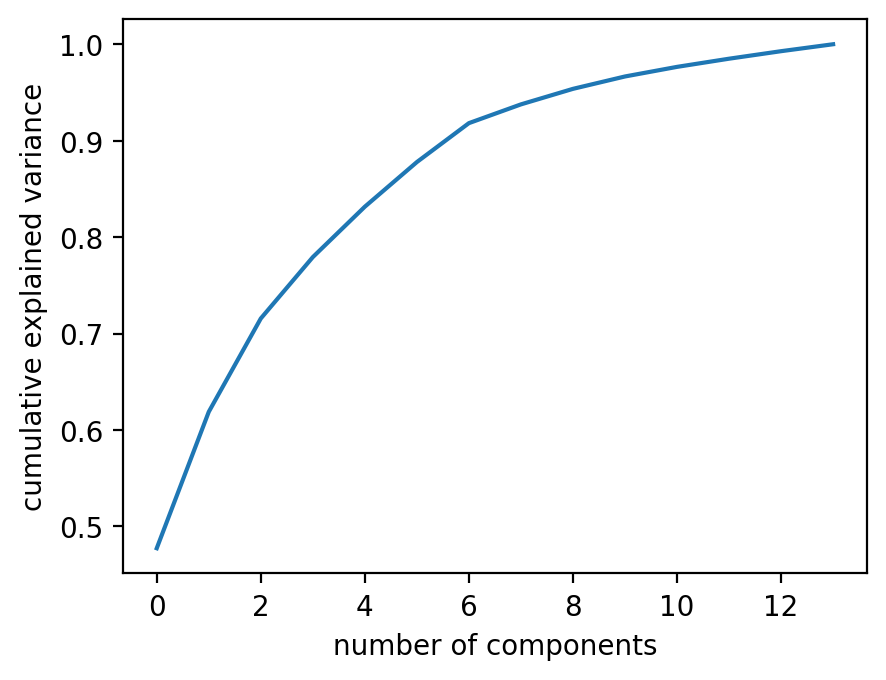

In [8]:
# Plot explained variance as function of number of components
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

- We now perform the PCA with 2 components, which retain over 60% of variance.

explained variance:
 [0.303584  0.0899758]
pca components:
 [[ 0.17317333 -0.24347632  0.37630587  0.00407198  0.00647824 -0.09651745
  -0.4177784  -0.25648506  0.50973958  0.37758355  0.06788546 -0.18719402
   0.242405   -0.13642812]
 [-0.09569193 -0.32740188  0.22185373  0.03934685  0.01107183 -0.08143959
  -0.4408372  -0.23035275 -0.68905923 -0.22922839  0.00872885  0.09107262
   0.15393189 -0.13897942]]
feature names:
 ['crime_rate', 'proportion_flats', 'proportion_nonretail', 'new_store', 'commercial_property', 'household_size', 'proportion_newbuilds', 'public_transport_dist', 'transport_availability', 'property_value', 'school_proximity', 'competitor_density', 'household_affluency', 'county']


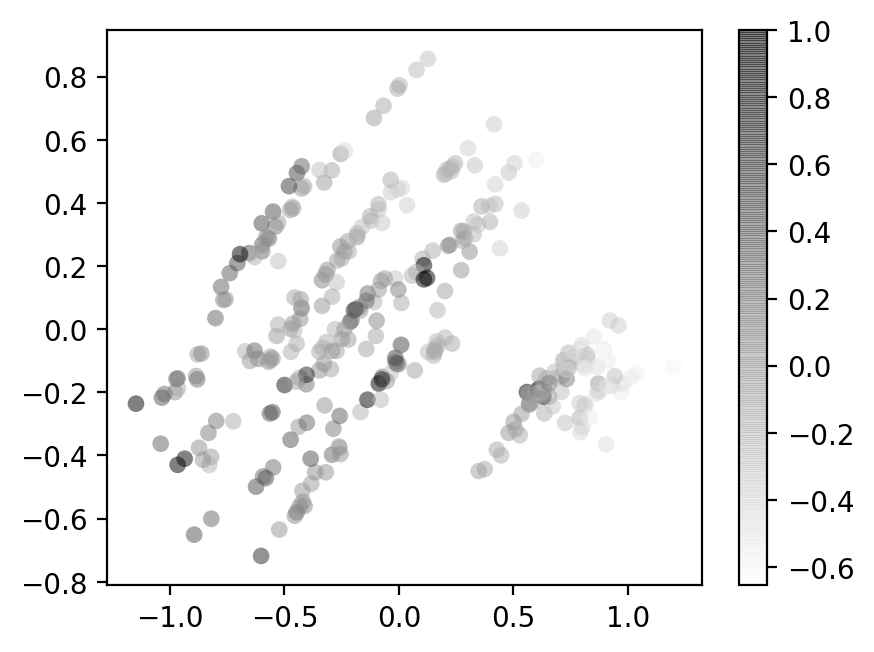

In [9]:
pca = PCA(0.6)
pca.fit(X)
print('explained variance:\n', pca.explained_variance_)
print('pca components:\n', pca.components_)
print('feature names:\n', X.columns.to_list())

X_proj = pca.transform(X)

plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('binary'))
plt.colorbar()

- The largest two weights in the PCA components come from the 9th and the 7th features, which are `transport_availability` and `proportion_newbuilds` respectively. These are the most important characteristics to differentiate a store.
- The weights for `new_store`, `commercial_property`, and `school_proximity` are below 1% in both components. These don't make much difference for stores.
- There is a prominantly distinct cluster on the bottom right conner, which look like the worst performing stores.

We can measure the mutual information between features and sales, to see how correlated each feature is in terms of affecting sales.

In [17]:
# Mutual information
from sklearn.feature_selection import mutual_info_regression
X = df.drop(['normalised_sales', 'location_id'], axis=1)
y = df['normalised_sales']
print('mutual information:\n', mutual_info_regression(X, y))
print('feature names ranked by MI:\n', [x for _, x in sorted(zip(mutual_info_regression(X, y).tolist(), X.columns.to_list()), reverse=True)])

mutual information:
 [0.2860765  0.15034243 0.43705163 0.00243578 0.14810415 0.50247622
 0.30717937 0.27381882 0.19284949 0.30593128 0.25733831 0.11877908
 0.69753483 0.60649065]
feature names ranked by MI:
 ['household_affluency', 'county', 'household_size', 'proportion_nonretail', 'property_value', 'proportion_newbuilds', 'crime_rate', 'public_transport_dist', 'school_proximity', 'transport_availability', 'proportion_flats', 'commercial_property', 'competitor_density', 'new_store']


- The most influential features ranked by mutual information are `household_affluency`, `county`, and `household_size`.
- The least relevant ones are `competitor_density` and `new_store`.

The quality of the data is high. But it would be helpful to have less missing data points. 

From the above preliminary analysis, it is advisable to collect more detailed data on transport, e.g., types, frequencies, gas stations, and neibourghood newbuilds, e.g., build dates, property types.   

## Q2
Build a model that can predict store sales based on the provided area features. Please show how you developed the model and report how well your model is performing. ***Constraint:*** Please use Random Forest as the model family to solve this problem. 

## A2
We train a base model from scikit-learn first and look at the performance as the reference point for optimisation. Then we do a random grid search for some hyperparameters to optimise the model. Using these rough hyperparameters, we do another more thorough grid search in the proximity. 

The training processes for both grid searches have subsequently been commented out, since they are resource intensive and the results are not 100% reproducible.

In [28]:
# Import random forest regressor model class
from sklearn.ensemble import RandomForestRegressor
# Split dataframe
X = df.drop(['normalised_sales', 'location_id'], axis=1)
y = df['normalised_sales']

- We first build a minimal working model using random forest regressor with default parameters.

In [11]:
# Cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor()
fold = 10
base_model_cv = cross_val_score(model, X, y, cv=fold)
print(f'base model cross validation score:', base_model_cv.mean(), 'at', fold, 'fold holdouts')

base model cross validation score: 0.8553829592762492 at 10 fold holdouts


- The base model has a mean cross validation score of about 85%. 
- We would like to optimise the hyperparameters, first with a random grid search for the important features.

In [12]:
# Print out available hyper parameters
model = RandomForestRegressor()

from pprint import pprint
print('Hyperparameters in random forest regressor:\n')
pprint(model.get_params())

Hyperparameters in random forest regressor:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [13]:
# Random grid search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
 
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Base model of random forest
model = RandomForestRegressor()

random_grid_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=200, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [14]:
# Fit the random grid search model
#random_grid_search.fit(X, y)
#random_grid_search.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 43,
 'bootstrap': False}

- The random grid search returned the following parameters

`{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 43,
 'bootstrap': False}`.

In [12]:
#random_model = random_grid_search.best_estimator_
random_model = RandomForestRegressor(bootstrap=False, max_depth=43, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=600)
fold = 10
cv = cross_val_score(random_model, X, y, cv=fold)
print(f'best random model cross validation score:', cv.mean(), 'at', fold, 'fold holdouts')

best random model cross validation score: 0.893517796049176 at 10 fold holdouts


- The best model from this random search gives a cross validation score of about 89%, which is a 4% improvement compared to the base model.
- We can try to do a full grid search near these hyperparameters.

In [16]:
# Perform grid search based on previous random grid search result
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False, True],
    'max_depth': [None, 20, 40, 60, 80, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [400, 500, 600, 700, 800, 900, 1000]
}

# Base model
model = RandomForestRegressor()

# Instantiate grid search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [17]:
# Fit the grid search to the data
#grid_search.fit(X, y)
#grid_search.best_params_

Fitting 3 folds for each of 336 candidates, totalling 1008 fits


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

- The grid search returned the following hyperparameters

`{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}`.

In [24]:
#best_model = grid_search.best_estimator_
best_model = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=400)
fold = 10
cv = cross_val_score(best_model, X, y, cv=fold)
print(f'best model cross validation score:', cv.mean(), 'at', fold, 'fold holdouts')

best model cross validation score: 0.8959292525394742 at 10 fold holdouts


- The best model from this grid search performs about the same as the previous model, at about 90%. There seems to be a marginal increase at <1%. This is likely to be the best performance we can harness from the random forest regressor for this task.

## Q3
The dataset contains a test set of potential store locations. Use your developed model to predict the sales value in these areas and explain what recommendations you would give to the Stores Team to use it. Use any tools that may help you to share your findings with product owners and other non-technical decision makers in the team. Complete this task by explaining how you would improve the current results.

## A3
We use the optimised hyperparameters obtained from the grid searches 

`{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}`
 
to train the model on the full training set from `train.csv`, and predict the `normalised_sales` on the test set from `test.csv`. We look at the feature importance to have a better understanding of the model.

We make our recommendations based on the top performing stores according to the model prediction, and use `treeinterpreter` to anaylyse the feature contributions for each of them. We also make the same analysis for the worst performing stores. This allowes us to better interpret our results and communicate with the Stores Team.

In [27]:
# Train random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=400)
model.fit(X, y)

# Predict `normalised_sales`
X_test = df_test.drop(['location_id'], axis=1)
print('test data shape:', X_test.shape)
y_pred = model.predict(X_test)
print('prediction shape:', y_pred.shape)
print(y_pred)

test data shape: (13, 14)
prediction shape: (13,)
[ 0.24524326  2.27882532 -0.70753163  0.03779718 -1.54249393 -1.01586649
  0.14743402  1.76784082  0.881126    0.2575614  -0.55355496  2.69374474
 -0.35654659]


The predicted sales for the 13 test data are 

`[ 0.24524326  2.27882532 -0.70753163  0.03779718 -1.54249393 -1.01586649
  0.14743402  1.76784082  0.881126    0.2575614  -0.55355496  2.69374474
 -0.35654659]`.

In [28]:
# Sort features by their relative importance in the trained model
df_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)
df_importance

,feature,importance
5,household_size,0.228193
12,household_affluency,0.212874
13,county,0.210295
0,crime_rate,0.057485
2,proportion_nonretail,0.055806
9,property_value,0.047844
7,public_transport_dist,0.045625
10,school_proximity,0.033813
6,proportion_newbuilds,0.031219
4,commercial_property,0.030907


- The model highly weighs the influences from `household_size`, `household_affluency`, and `county`, which make up to 65% of the decision in total. The model suggests that these features are the most important factors when determining the location of a new store.
- The weight for `new_store` is much lower than others, at 0.2%. It suggests that whether a new store was opened recently does not matter, which is bizzare. It's likely that we need to collect more detailed data on new stores, e.g., distances and dates, to improve the model.
- We can rank the data by the predicted sales and have a look at the predicted sales along with the features.

In [29]:
# Append predicted sales to test dataframe
df_predicted = df_test.assign(normalised_sales=y_pred)
# Sort dataframe by predicted sales
df_sorted = df_predicted.sort_values('normalised_sales', ascending=False)
# Sort columns by feature importance
df_sorted = df_sorted[['location_id', 'normalised_sales'] + df_importance['feature'].tolist()]
df_sorted

,location_id,normalised_sales,household_size,household_affluency,county,crime_rate,proportion_nonretail,property_value,public_transport_dist,school_proximity,proportion_newbuilds,commercial_property,competitor_density,proportion_flats,transport_availability,new_store
11,148,2.693745,5.337,0.6175,122,0.650078,6.20,307,3.8384,17.400000,26.7,7.850000,385.91,0.0,3,0
1,400,2.278825,5.398,1.4775,140,0.587758,3.97,264,2.2885,13.000000,8.5,14.850000,386.86,20.0,2,0
7,199,1.767841,2.875,2.2200,107,9.341992,18.10,666,1.1296,20.200000,10.4,15.900000,347.88,0.0,4,1
8,477,0.881126,4.088,1.9625,69,0.010238,2.97,285,7.3073,15.300000,79.2,2.500000,394.72,90.0,0,0
9,341,0.257561,3.431,1.2700,58,0.216802,7.38,287,5.4159,19.600000,85.3,7.150000,393.68,0.0,2,0
0,105,0.245243,3.590,2.3750,42,0.039968,6.09,329,5.4917,16.100000,59.6,4.150000,395.75,34.0,3,0
6,12,0.147434,3.169,1.4525,63,0.159895,6.91,233,5.7209,17.900000,93.4,4.900000,383.37,0.0,0,0
3,227,0.037797,3.066,1.6075,62,1.517409,19.58,403,1.7573,14.700000,0.0,12.750000,353.89,0.0,2,0
12,363,-0.356547,3.127,3.5225,63,0.148222,8.56,384,2.1224,20.900000,14.8,16.868557,387.69,0.0,2,0
10,136,-0.553555,3.297,4.3175,56,5.751892,18.10,666,2.3682,18.589494,8.2,18.150000,385.09,0.0,4,0


- The best performing stores are predicted to be 11, 1, 7, which have `normalised_sales` predicted to be above 1. Let us look at their featue contributions.

In [37]:
#%pip install treeinterpreter

Note: you may need to restart the kernel to use updated packages.


In [52]:
# Use treeinterpreter to look at the contributions of each features
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(model, X_test)

In [53]:
# Analyse the best performing store
location_11_contributions = pd.DataFrame({'feature': X.columns, 'value': X_test.loc[11].values, 'contribution': contributions[11], 'contribution ratio': contributions[11] / (prediction[11] - bias[11])}).sort_values('contribution', ascending=False)
print('location 11 predicted sales:', prediction[11])
location_11_contributions

location 11 predicted sales: [2.69374474]


,feature,value,contribution,contribution ratio
13,county,122.000000,1.113689,0.410848
5,household_size,5.337000,0.897608,0.331134
12,household_affluency,0.617500,0.460247,0.169788
10,school_proximity,17.400000,0.050854,0.018760
0,crime_rate,0.650078,0.043455,0.016031
2,proportion_nonretail,6.200000,0.038487,0.014198
4,commercial_property,7.850000,0.037769,0.013933
6,proportion_newbuilds,26.700000,0.035789,0.013203
11,competitor_density,385.910000,0.035351,0.013041
9,property_value,307.000000,0.010072,0.003716


In [62]:
# Anaylse the second best performing store
location_1_contributions = pd.DataFrame({'feature': X.columns, 'value': X_test.loc[1].values, 'contribution': contributions[1], 'contribution ratio': contributions[1] / (prediction[1] - bias[1])}).sort_values('contribution', ascending=False)
print('location 1 predicted sales:', prediction[1])
location_1_contributions

location 1 predicted sales: [2.27882532]


,feature,value,contribution,contribution ratio
13,county,140.000000,0.972651,0.423667
5,household_size,5.398000,0.937830,0.408499
10,school_proximity,13.000000,0.097268,0.042368
2,proportion_nonretail,3.970000,0.079989,0.034842
6,proportion_newbuilds,8.500000,0.066027,0.028760
7,public_transport_dist,2.288500,0.054308,0.023656
9,property_value,264.000000,0.043581,0.018983
1,proportion_flats,20.000000,0.035189,0.015328
11,competitor_density,386.860000,0.025141,0.010951
0,crime_rate,0.587758,0.023844,0.010386


In [61]:
# Analysis the third best performing store.
location_7_contributions = pd.DataFrame({'feature': X.columns, 'value': X_test.loc[7].values, 'contribution': contributions[7], 'contribution ratio': contributions[7] / (prediction[7] - bias[7])}).sort_values('contribution', ascending=False)
print('location 7 predicted sales:', prediction[7])
location_7_contributions

location 7 predicted sales: [1.76784082]


,feature,value,contribution,contribution ratio
13,county,107.000000,1.184508,0.663662
7,public_transport_dist,1.129600,0.442338,0.247835
12,household_affluency,2.220000,0.299341,0.167716
0,crime_rate,9.341992,0.093399,0.052330
3,new_store,1.000000,0.026994,0.015124
8,transport_availability,4.000000,0.016340,0.009155
2,proportion_nonretail,18.100000,0.012475,0.006989
11,competitor_density,347.880000,0.006090,0.003412
6,proportion_newbuilds,10.400000,-0.000257,-0.000144
1,proportion_flats,0.000000,-0.011554,-0.006473


- The worst performing stores are predicted to be 2, 5, 4. It is instrucitve to see why they are ranked so low.

In [63]:
# Analysis the worst performing store.
location_4_contributions = pd.DataFrame({'feature': X.columns, 'value': X_test.loc[4].values, 'contribution': contributions[4], 'contribution ratio': contributions[4] / (prediction[4] - bias[4])}).sort_values('contribution', ascending=True)
print('location 4 predicted sales:', prediction[4])
location_4_contributions

location 4 predicted sales: [-1.54249393]


,feature,value,contribution,contribution ratio
0,crime_rate,83.093533,-0.377086,0.247184
12,household_affluency,5.155000,-0.254308,0.166702
13,county,22.000000,-0.160065,0.104925
7,public_transport_dist,1.802600,-0.129405,0.084826
4,commercial_property,16.450000,-0.099051,0.064929
9,property_value,666.000000,-0.096197,0.063058
5,household_size,2.957000,-0.083187,0.054530
6,proportion_newbuilds,0.000000,-0.077845,0.051029
11,competitor_density,16.450000,-0.070496,0.046211
10,school_proximity,20.200000,-0.067263,0.044092


In [64]:
# Analysis the second worst performing store.
location_5_contributions = pd.DataFrame({'feature': X.columns, 'value': X_test.loc[5].values, 'contribution': contributions[5], 'contribution ratio': contributions[5] / (prediction[5] - bias[5])}).sort_values('contribution', ascending=True)
print('location 5 predicted sales:', prediction[5])
location_5_contributions

location 5 predicted sales: [-1.01586649]


,feature,value,contribution,contribution ratio
12,household_affluency,4.880000,-0.242616,0.242883
0,crime_rate,10.988323,-0.203550,0.203774
13,county,19.000000,-0.174964,0.175156
9,property_value,666.000000,-0.095348,0.095453
4,commercial_property,19.500000,-0.077520,0.077605
10,school_proximity,20.200000,-0.069111,0.069187
2,proportion_nonretail,18.100000,-0.058926,0.058991
5,household_size,3.406000,-0.052837,0.052896
6,proportion_newbuilds,2.800000,-0.051243,0.051299
8,transport_availability,4.000000,-0.034382,0.034420


In [65]:
# Analysis the third worst performing store.
location_2_contributions = pd.DataFrame({'feature': X.columns, 'value': X_test.loc[2].values, 'contribution': contributions[2], 'contribution ratio': contributions[2] / (prediction[2] - bias[2])}).sort_values('contribution', ascending=True)
print('location 2 predicted sales:', prediction[2])
location_2_contributions

location 2 predicted sales: [-0.70753163]


,feature,value,contribution,contribution ratio
12,household_affluency,4.970000,-0.405915,0.587801
6,proportion_newbuilds,0.000000,-0.174213,0.252276
5,household_size,2.813000,-0.118482,0.171572
2,proportion_nonretail,8.140000,-0.077883,0.112782
13,county,55.000000,-0.071826,0.104010
4,commercial_property,9.400000,-0.032588,0.047190
1,proportion_flats,0.000000,-0.019701,0.028529
3,new_store,0.000000,-0.001524,0.002207
8,transport_availability,1.000000,0.004734,-0.006855
0,crime_rate,1.116926,0.022093,-0.031993


In summary, we recommend building stores at location 11, 1, and 7.

- Location 11 is predicted to have `normalised_sales` at 2.69. The prediction is based primarily on its `county` 122 track record, large `household_size` at 5.34, and low `household_affluency` at 0.618.
- Location 1 is predicted to have `normalised_sales` at 2.28. The prediction is based primarily on its `county` 140 track record, large `household_size` at 5.40, and low `school_proximity` at 13.0.
- Location 7 is predicted to have `normalised_sales` at 1.77. The prediction is based primarily on its `county` 107 track record, low `public_transport_dist` at 1.13, and relatively low `household_affluency` at 2.22.


We are also highly critical at building stores at location 4, 5, and 2.
- Location 4 is predicted to have `normalised_sales` at -1.54. The prediction is based primarily on its high `crime_rate` at 83.1, high `household_affluency` at 5.16, and poor performing `county` 22.
- Location 5 is predicted to have `normalised_sales` at -1.02. The prediction is based primarily on its high `household_affluency` at 4.88, relatively high `crime_rate` at 11.0, and poor performing `county` 19.
- Location 2 is predicted to have `normalised_sales` at -0.708. The prediction is based primarily on its high `household_affluency` at 4.97, low `proportion_newbuilds` at 0, and small `household_size` at 2.81.


-------------

## Masked Dataset

You are given the following small dataset, which has been completely masked for privacy reasons. Please train the best model you can come up with to predict the target variable `y` based on the features `x1` and `x2`. Explain every step you take. 

Assuming that this model will be used for making decisions involving important sums of money, provide any comments that you think you should be giving to the business as a technical expert.

Dataset files
* `masked_dataset/train.csv`

As the data set is small, we cannot hope to appeal to neural networks here. We inspect the data first with some plots, then try out a few regressors. We select the most promising model and tune its hyperparameters.

- We first have a look at the raw data, and make some scatter plots to spot any patterns.

In [1]:
pd.read_csv('data/masked_dataset/train.csv')

,x1,x2,y
0,0.784119,0.948352,1.437410
1,0.911072,0.787079,0.943558
2,0.549740,0.906819,1.197050
3,0.036095,0.791149,0.408959
4,0.581530,0.609205,0.836620
...,...,...,...
95,0.108033,0.335304,-0.173461
96,0.438655,0.124661,0.218181
97,0.404851,0.837397,0.609993
98,0.444191,0.053309,0.338044


In [2]:
# Split dataframe to X and y
df_masked = pd.read_csv('data/masked_dataset/train.csv')
X_masked = df_masked[['x1', 'x2']]
y_masked = df_masked['y']

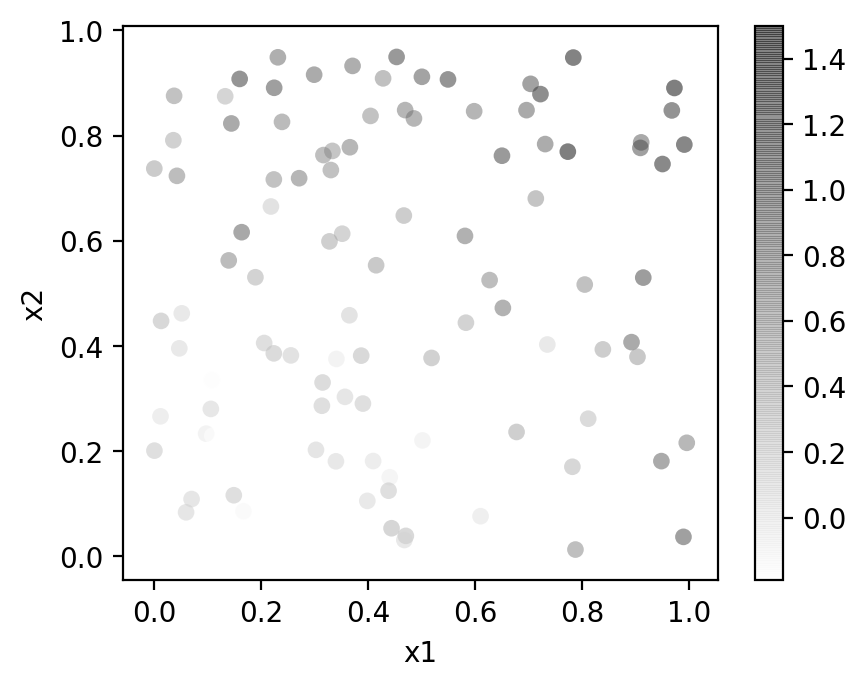

In [43]:
# Plot `y` as color map on `x1` and `x2`
plt.scatter(X_masked['x1'], X_masked['x2'], c=y_masked, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('binary'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

- The values of `y` look positively correlated with both `x1` and `x2`.

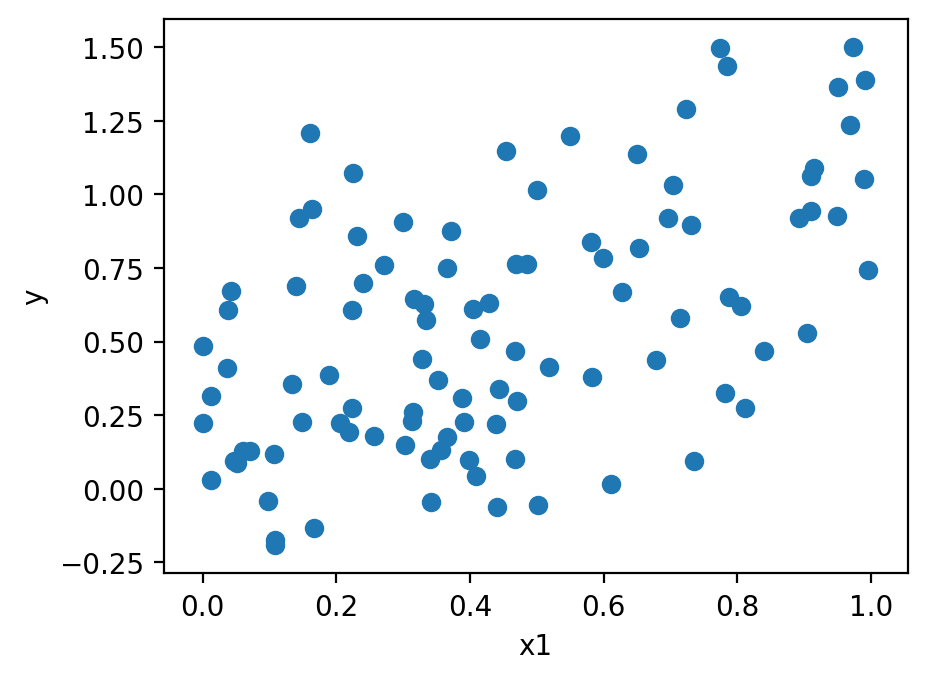

In [4]:
plt.xlabel('x1')
plt.ylabel('y')
plt.scatter(X_masked['x1'], y_masked)

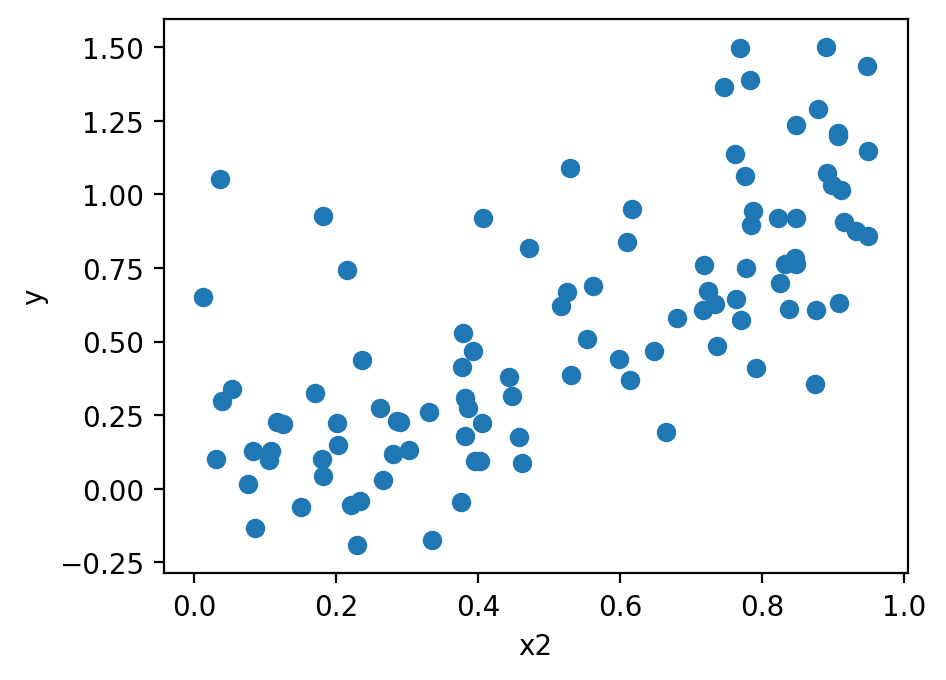

In [5]:
plt.xlabel('x2')
plt.ylabel('y')
plt.scatter(X_masked['x2'], y_masked)

- The plots suggest a low degree polynomial relation between `x1`, `x2` and `y`. We shall try linear, ridge, and support vector regressions with polynomial kernels.
- Let us first try them without polynomial features.

In [103]:
# Linear, ridge, and support vector regression without kernel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

linear = LinearRegression()
ridge = Ridge()
svr = SVR(kernel='linear')
fold = 10

linear_cv = cross_val_score(linear, X_masked, y_masked, cv=fold)
linear.fit(X_masked, y_masked)
print('linear regression score:', linear.score(X_masked, y_masked))
print(f'linear regression cross validation score:', linear_cv.mean(), 'at', fold, 'fold holdouts')

ridge_cv = cross_val_score(ridge, X_masked, y_masked, cv=fold)
ridge.fit(X_masked, y_masked)
print('ridge regression score:', ridge.score(X_masked, y_masked))
print(f'ridge regression cross validation score:', ridge_cv.mean(), 'at', fold, 'fold holdouts')

svr_cv = cross_val_score(svr, X_masked, y_masked, cv=fold)
svr.fit(X_masked, y_masked)
print('support vector regression score:', svr.score(X_masked, y_masked))
print(f'support vector regression cross validation score:', svr_cv.mean(), 'at', fold, 'fold holdouts')


linear regression score: 0.7424472892688672
linear regression cross validation score: 0.64730242464455 at 10 fold holdouts
ridge regression score: 0.7347561559637267
ridge regression cross validation score: 0.6499934221537552 at 10 fold holdouts
support vector regression score: 0.7399116943076702
support vector regression cross validation score: 0.6449853261058881 at 10 fold holdouts


- Wihout polynomial features, they perform poorly and simililarly, which is expected given the plots above. Let us inject some non-linearity, and observe the validation curves.

In [111]:
# Define linear, ridge, and support vector regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def PolynomialLinear(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
def PolynomialRidge(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), Ridge(**kwargs))
def PolynomialSVR(degree=2, **kwargs):
    return SVR(kernel='poly', degree=degree, **kwargs)

Text(0.5, 1.0, 'linear regression')

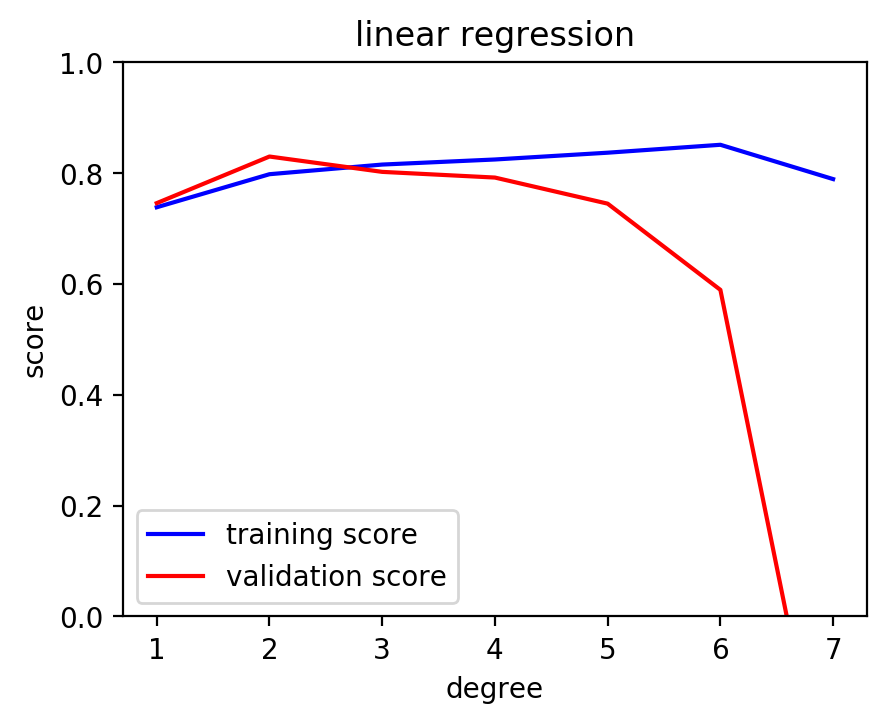

In [90]:
# Linear regression validation curve
from sklearn.model_selection import validation_curve 
degree = np.arange(1, 8) 
train_score, val_score = validation_curve(PolynomialLinear(), X_masked, y_masked, param_name='polynomialfeatures__degree', param_range=degree, cv=10)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') 
plt.legend(loc='best') 
plt.ylim(0, 1) 
plt.xlabel('degree') 
plt.ylabel('score')
plt.title('linear regression')

Text(0.5, 1.0, 'ridge regression')

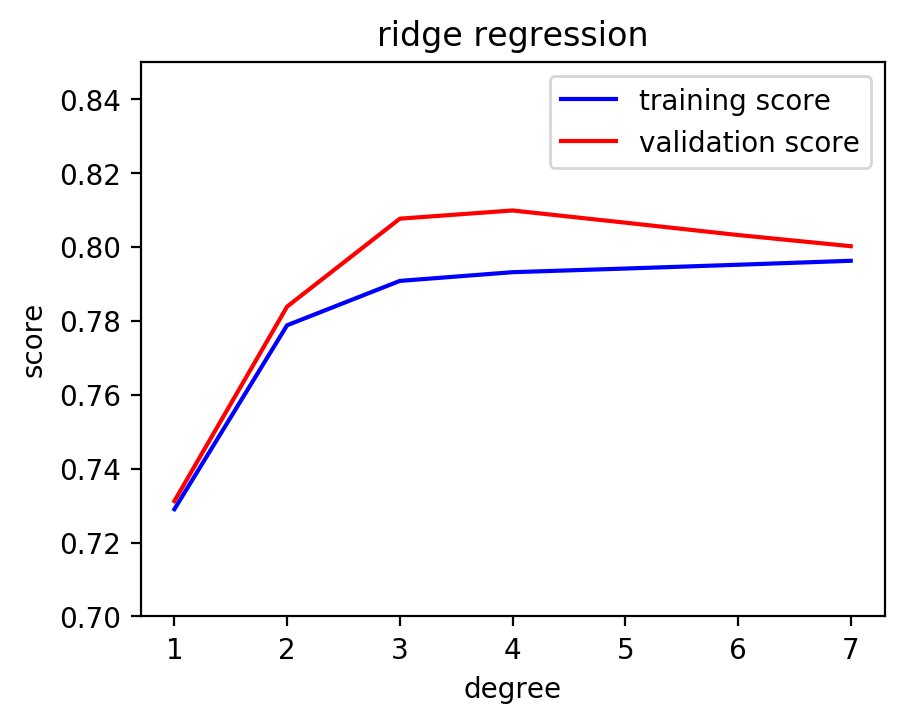

In [87]:
# Linear regression validation curve
from sklearn.model_selection import validation_curve 
degree = np.arange(1, 8) 
train_score, val_score = validation_curve(PolynomialRidge(), X_masked, y_masked, param_name='polynomialfeatures__degree', param_range=degree, cv=10)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') 
plt.legend(loc='best') 
plt.ylim(0.7, 0.85) 
plt.xlabel('degree') 
plt.ylabel('score')
plt.title('ridge regression')

Text(0.5, 1.0, 'support vector regression')

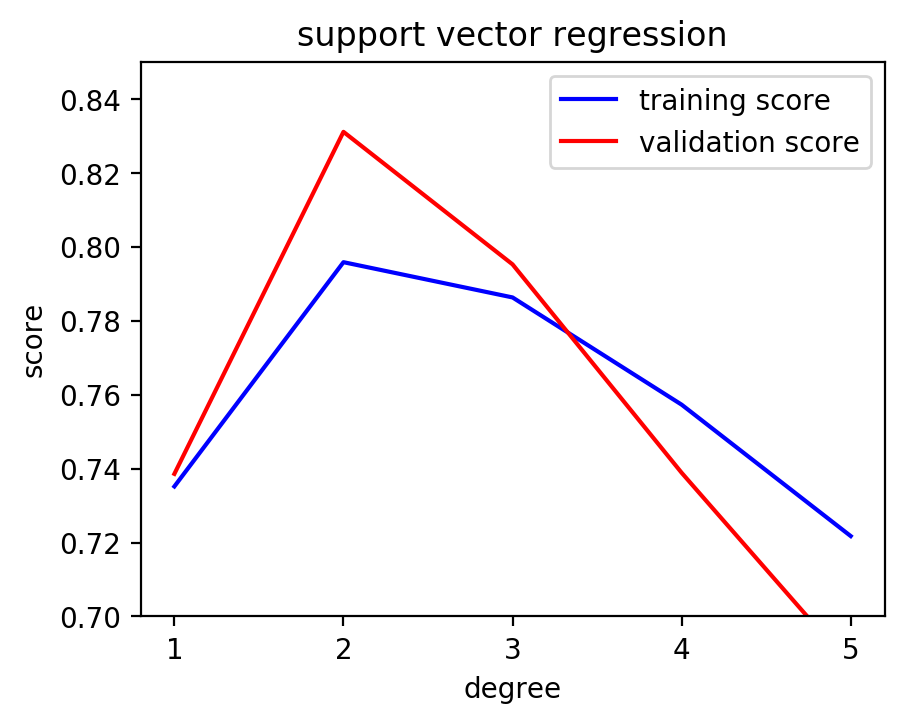

In [119]:
# Support vector regression validation curve
from sklearn.model_selection import validation_curve 
degree = np.arange(1, 6) 
train_score, val_score = validation_curve(PolynomialSVR(), X_masked, y_masked, param_name='degree', param_range=degree, cv=10)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') 
plt.legend(loc='best') 
plt.ylim(0.7, 0.85) 
plt.xlabel('degree') 
plt.ylabel('score')
plt.title('support vector regression')

- The linear regression is optimal with degree 2 polynomial features.
- The ridge regression is optimal with degree 4 polynomial features.
- The support vector regression is optimal with degree 2 polynomial features.

In [120]:
poly_linear = PolynomialLinear(2)
poly_ridge = PolynomialRidge(4)
poly_svr = PolynomialSVR(2)
fold = 10

poly_linear_cv = cross_val_score(poly_linear, X_masked, y_masked, cv=fold)
print(f'polynomial linear regression cross validation score:', poly_linear_cv.mean(), 'at', fold, 'fold holdouts')

poly_ridge_cv = cross_val_score(poly_ridge, X_masked, y_masked, cv=fold)
print(f'polynomial ridge regression cross validation score:', poly_ridge_cv.mean(), 'at', fold, 'fold holdouts')

poly_svr_cv = cross_val_score(poly_svr, X_masked, y_masked, cv=fold)
print(f'polynomial support vector regression cross validation score:', poly_svr_cv.mean(), 'at', fold, 'fold holdouts')

polynomial linear regression cross validation score: 0.7262957444712012 at 10 fold holdouts
polynomial ridge regression cross validation score: 0.724258844952421 at 10 fold holdouts
polynomial support vector regression cross validation score: 0.7308814811633262 at 10 fold holdouts


- We can see that the degree 2 polynomial support vector regression performs the best, with cross validation score at 0.731.
- Since the support vector machine will also inference faster, let us adopt the support vector machine and tune the hyperparameters with grid searches.

In [98]:
# Print out available hyper parameters
model = SVR(kernel='poly')

from pprint import pprint
print('Hyperparameters in support vector regressor:\n')
pprint(model.get_params())

Hyperparameters in support vector regressor:

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [142]:
# Perform grid search for the support vector regression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'shrinking': [False, True],
    'gamma': ['scale', 'auto'],
    'coef0': [0, 0.01, 0.1, 0.2, 1],
    'C': [0.01, 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2, 0.3, 0.5]
}

# Base model
model = PolynomialSVR(2)

# Instantiate grid search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0)

In [143]:
# Fit the grid search to the data
#grid_search.fit(X_masked, y_masked)
#grid_search.best_params_

{'C': 0.1, 'coef0': 0, 'epsilon': 0.2, 'gamma': 'scale', 'shrinking': False}

- The best hyperparameters according to the grid search are
`{'C': 0.1, 'coef0': 0, 'epsilon': 0.2, 'gamma': 'scale', 'shrinking': False}`

In [139]:
best_svr = PolynomialSVR(2, C=0.1, coef0=0, epsilon=0.2, gamma='scale', shrinking=False)
fold = 10

best_svr_cv = cross_val_score(best_svr, X_masked, y_masked, cv=fold)
print(f'polynomial support vector regression cross validation score:', best_svr_cv.mean(), 'at', fold, 'fold holdouts')

polynomial support vector regression cross validation score: 0.7340720929050688 at 10 fold holdouts


- The optimised support vector regressor performs slightly better, with a cross validation score of 0.734.
- Let us fit the model and look at the error.

In [141]:
from sklearn.metrics import mean_absolute_error
best_svr.fit(X_masked, y_masked)
print('support vector regression MAE:', mean_absolute_error(y_masked, best_svr.predict(X_masked)))

support vector regression MAE: 0.15210807724390943


In summary, the best model we built is a support vector machine regressor with the following parameters

`{'kernel': 'poly', 'degree': '2', 'C': 0.1, 'coef0': 0, 'epsilon': 0.2, 'gamma': 'scale', 'shrinking': False}`.

The 10 fold cross validation score is at 0.734 and the mean absolute error is at 0.152. The performance is adequate for the model predictions to be used as a rough estimate. However, it should not be used as the sole determining factor when considering important decisions.

As the data set is quite small, it is expected that the model can improve significantly with more data.